In [1]:
import os
from dcapy import dca
from dcapy.models import CashFlow, ChgPts, CashFlowModel, Period, Scenario, CashFlowParams
from dcapy.weiner import Weiner

import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import seaborn as sns

In [2]:
cashflow_params = [
            {
                'name':'fix_opex',
                'value':-5.000,
                'target':'opex',
            },
            {
                'name':'var_opex',
                'value':-0.005,
                'iter':1,
                'target':'opex',
                'multiply':'oil_volume'
            },
            {
                'name':'income',
                'value':Weiner(initial_condition=60,ti='2021-01-01', generator={'dist':'norm','kw':{'loc':0.0,'scale':0.02}}),   #[0.060,0.045,0.02],
                'iter':5,
                'target':'income',
                'multiply':'oil_volume'
            },
            {
                'name':'capex',
                'value':{'date':['2021-01-01'],'value':[-70000]},
                'target':'capex'
            }
    ]

CashFlowParams(**cashflow_params[2]).get_value(0,steps=10, freq_output='M')

ChgPts(date=[datetime.date(2021, 1, 1), datetime.date(2021, 2, 1), datetime.date(2021, 3, 1), datetime.date(2021, 4, 1), datetime.date(2021, 5, 1), datetime.date(2021, 6, 1), datetime.date(2021, 7, 1), datetime.date(2021, 8, 1), datetime.date(2021, 9, 1), datetime.date(2021, 10, 1)], value=[60.0, 65.11877280468299, 60.51235734967255, 75.79794054852441, 68.03163126636414, 68.07750716672265, 66.34926773060904, 55.21769546388741, 52.65220345573669, 49.9026003797814])

In [3]:
cashflow_params[2]

{'name': 'income',
 'value': Weiner(initial_condition=60.0, ti=datetime.date(2021, 1, 1), generator=ProbVar(dist='norm', kw={'loc': 0.0, 'scale': 0.02}, seed=None), freq='D', drift=0),
 'iter': 5,
 'target': 'income',
 'multiply': 'oil_volume'}

In [4]:
p1_dict = {
    'name':'pdp',
    'dca': {
        'ti':'2021-01-01',
        'di':0.15,
        'freq_di':'A',
        'qi':2500, #{'dist':'norm', 'kw':{'loc':2500,'scale':200}}, #[800,1000],
        'b':0,
        'fluid_rate':5000
    },
    'start':'2021-01-01',
    'end':'2030-01-01',
    'freq_input':'A',
    'freq_output':'A',
    'rate_limit': 80,
    'iter':10,
    'cashflow_params':cashflow_params
}
p1 = Period(**p1_dict)
p1

Period(name='pdp', dca=Declination 
 Ti: 2021-01-01 
 Qi: 2500.0 bbl/d 
 Di: 0.15 A 
 b: 0.0, start=datetime.date(2021, 1, 1), end=datetime.date(2030, 1, 1), time_list=None, freq_input='A', freq_output='A', rate_limit=80.0, cum_limit=None, iter=10, ppf=None, cashflow_params=[CashFlowParams(name='fix_opex', const_value=None, wi=1.0, periods=None, value=-5.0, array_values=None, target='opex', multiply=None, agg='sum', depends=False, iter=1), CashFlowParams(name='var_opex', const_value=None, wi=1.0, periods=None, value=-0.005, array_values=None, target='opex', multiply='oil_volume', agg='sum', depends=False, iter=1), CashFlowParams(name='income', const_value=None, wi=1.0, periods=None, value=Weiner(initial_condition=60.0, ti=datetime.date(2021, 1, 1), generator=ProbVar(dist='norm', kw={'loc': 0.0, 'scale': 0.02}, seed=None), freq='D', drift=0), array_values=None, target='income', multiply='oil_volume', agg='sum', depends=False, iter=5), CashFlowParams(name='capex', const_value=None, wi=1.

In [5]:
fore1 = p1.generate_forecast()
fore1

/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:239: RuntimeWarning: invalid value encountered in true_divide
  (np.power(qi / rate, b) - 1)/(b * di)
/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:63: RuntimeWarning: divide by zero encountered in true_divide
  return qi/np.power(1+b*di*time_array,1/b)
/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:80: RuntimeWarning: divide by zero encountered in true_divide
  g = np.power(b*di*time_array+1,(b-1)/b)
/home/scuervo/Documents/dev/apps/dcapy/dcapy/dca/arps.py:81: RuntimeWarning: divide by zero encountered in true_divide
  h = np.power(b*di*ti+1,(b-1)/b)


,oil_rate,oil_cum,iteration,oil_volume,fluid_rate,water_rate,bsw,wor,water_cum,fluid_cum,water_volume,fluid_volume,period
date,,,,,,,,,,,,,
2021,2500.000000,0.000000e+00,0,847359.810081,5000.0,2500.000000,0.500000,1.000000,0.000000e+00,0.0,1.039604e+06,1825000.0,pdp
2022,2151.769941,8.473598e+05,0,788344.578760,5000.0,2848.230059,0.569646,1.323668,1.039604e+06,1825000.0,1.094304e+06,1825000.0,pdp
2023,1852.045552,1.576689e+06,0,678534.467110,5000.0,3147.954448,0.629591,1.699718,2.188607e+06,3650000.0,1.196084e+06,1825000.0,pdp
2024,1594.070379,2.204429e+06,0,584705.901723,5000.0,3405.929621,0.681186,2.136624,3.431772e+06,5475000.0,1.285604e+06,1827500.0,pdp
2025,1371.465359,2.746101e+06,0,503261.033476,5000.0,3628.534641,0.725707,2.645736,4.759815e+06,7305000.0,1.361093e+06,1827500.0,pdp
2026,1180.431173,3.210951e+06,0,432474.912134,5000.0,3819.568827,0.763914,3.235740,6.153958e+06,9130000.0,1.424150e+06,1825000.0,pdp
2027,1016.006527,3.611051e+06,0,372234.606478,5000.0,3983.993473,0.796799,3.921228,7.608116e+06,10955000.0,1.479985e+06,1825000.0,pdp
2028,874.484922,3.955420e+06,0,320761.555651,5000.0,4125.515078,0.825103,4.717651,9.113929e+06,12780000.0,1.530223e+06,1827500.0,pdp
2029,752.366892,4.252574e+06,0,276082.029480,5000.0,4247.633108,0.849527,5.645694,1.066856e+07,14610000.0,1.571636e+06,1827500.0,pdp


<AxesSubplot:xlabel='date', ylabel='oil_rate'>

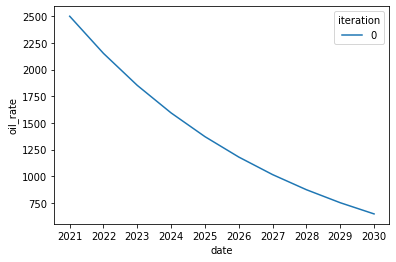

In [6]:
sns.lineplot(data=fore1,  x=fore1.index.to_timestamp(), y='oil_rate', hue='iteration')

In [7]:
c1 = p1.generate_cashflow()

In [8]:
c1[0].fcf()

,income,total_income,fix_opex,var_opex,total_opex,capex,total_capex,fcf,cum_fcf
2021,5.084159e+07,5.084159e+07,-5.0,-4236.799050,-4241.799050,-70000.0,-70000.0,5.076735e+07,5.076735e+07
2022,6.854061e+07,6.854061e+07,-5.0,-3941.722894,-3946.722894,0.0,0.0,6.853667e+07,1.193040e+08
2023,3.944636e+07,3.944636e+07,-5.0,-3392.672336,-3397.672336,0.0,0.0,3.944297e+07,1.587470e+08
2024,2.007352e+07,2.007352e+07,-5.0,-2923.529509,-2928.529509,0.0,0.0,2.007059e+07,1.788176e+08
2025,1.521732e+07,1.521732e+07,-5.0,-2516.305167,-2521.305167,0.0,0.0,1.521480e+07,1.940324e+08
2026,7.284083e+06,7.284083e+06,-5.0,-2162.374561,-2167.374561,0.0,0.0,7.281915e+06,2.013143e+08
2027,7.923985e+06,7.923985e+06,-5.0,-1861.173032,-1866.173032,0.0,0.0,7.922119e+06,2.092364e+08
2028,7.540440e+06,7.540440e+06,-5.0,-1603.807778,-1608.807778,0.0,0.0,7.538831e+06,2.167752e+08
2029,7.702069e+06,7.702069e+06,-5.0,-1380.410147,-1385.410147,0.0,0.0,7.700684e+06,2.244759e+08
2030,2.416958e+06,2.416958e+06,-5.0,-1275.050933,-1280.050933,0.0,0.0,2.415677e+06,2.268916e+08


In [9]:
p1.npv([0.0])

,npv,iteration
0.0,2.268916e+08,0
0.0,1.297280e+08,1
0.0,2.435373e+08,2
0.0,2.443090e+08,3
0.0,2.548397e+08,4


In [10]:
p1.irr(freq_output='A')

,irr
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [11]:
len(c1)

5